In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/flights_processed.csv')

In [3]:
df.head()

,Year,Month,DayOfMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,...,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
0,2023,1,1,7,2023-01-01,DL,N3758Y,2835,DEN,"Denver, CO",...,108.0,78.0,391.0,2,0.0,0.0,21.0,0.0,72.0,0
1,2023,1,1,7,2023-01-01,B6,N590JB,1370,MCO,"Orlando, FL",...,123.0,90.0,667.0,3,100.0,0.0,9.0,0.0,0.0,0
2,2023,1,1,7,2023-01-01,B6,N323JB,1371,LGA,"New York, NY",...,171.0,152.0,1076.0,5,0.0,0.0,0.0,0.0,NaN,0
3,2023,1,1,7,2023-01-01,B6,N323JB,1372,FLL,"Fort Lauderdale, FL",...,169.0,133.0,1076.0,5,0.0,0.0,0.0,0.0,NaN,0
4,2023,1,1,7,2023-01-01,B6,N962JT,1387,BOS,"Boston, MA",...,414.0,372.0,2611.0,11,28.0,0.0,11.0,0.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183349 entries, 0 to 2183348
Data columns (total 47 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayOfMonth                       int64  
 3   DayOfWeek                        int64  
 4   FlightDate                       object 
 5   Reporting_Airline                object 
 6   Tail_Number                      object 
 7   Flight_Number_Reporting_Airline  int64  
 8   Origin                           object 
 9   OriginCityName                   object 
 10  OriginState                      object 
 11  OriginStateName                  object 
 12  Dest                             object 
 13  DestCityName                     object 
 14  DestState                        object 
 15  DestStateName                    object 
 16  CRSDepTime                       int64  
 17  DepTime 

In [5]:
df[df.duplicated() == True] #No hay filas duplicadas

,Year,Month,DayOfMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,...,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings


[Text(0, 0.5, 'Minutos de atraso')]

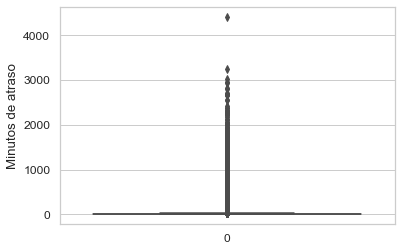

In [6]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [4, 5]})
sns.boxplot(
    df['DepDelayMinutes'], 
).set(ylabel='Minutos de atraso')

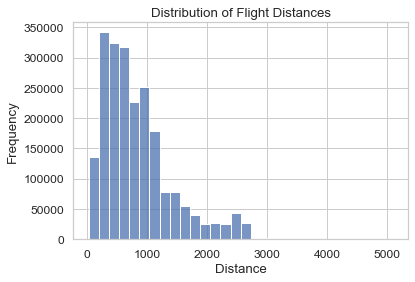

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Distance', bins=30)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

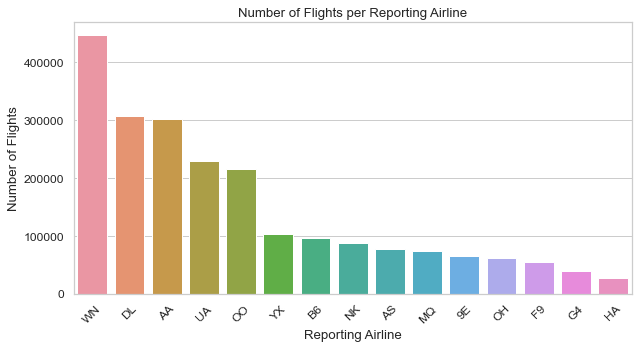

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Reporting_Airline', order=df['Reporting_Airline'].value_counts().index)
plt.title('Number of Flights per Reporting Airline')
plt.xlabel('Reporting Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

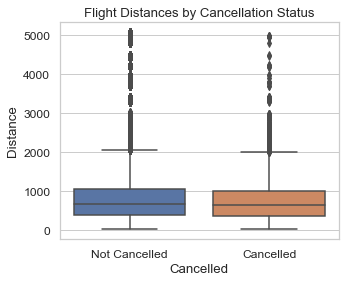

In [9]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Cancelled', y='Distance')
plt.title('Flight Distances by Cancellation Status')
plt.xlabel('Cancelled')
plt.ylabel('Distance')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()

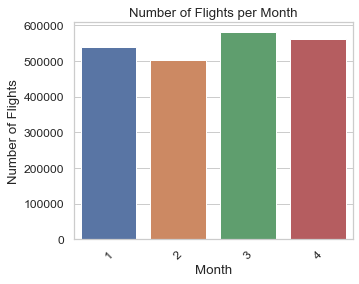

In [10]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Month')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

### Preguntar a los profes cual nos conviene para predecir entre flightsametime y flightsametime80

In [11]:
df['DayOfMonth'] = df['DayOfMonth'].astype(str)
df['DayOfWeek'] = df['DayOfWeek'].astype(str)